# Ford Gobike result study

## by Kihun Kim 

## Preliminary Wrangling : Motivation 

Have you ever tried to ride on shareable bike? Ford Gobike is one of shareable bike provider in US.Original dataset that we will use for this study,is saved by user data.That means we can get Information about how long,where and when Customer used this services. Moreover this project is more about visualization not wrangling.Therefore wrangling part will be presented minimum to concentrate more on visualization 

### Structure
1. Bivariate Exploration of data :  Single variable visualization
2. Univariate Exploration of data : Two variables visualization
3. Multivariate Exploration of data : More than 2 variables visualization

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style="darkgrid")
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [23]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
# load df

In [24]:
df.shape
#structure of df

(519700, 13)

In [25]:
sum(df.duplicated())
# No duplication 

0

In [26]:
df.isna().sum()
# there are a few missing value.Those are all numeric values. 

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### What is the structure of your dataset?

This dataset consists of 519700 rows and 13 columns

### What is/are the main feature(s) of interest in your dataset?

- user_type
- bike_id


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_time
- end_time
- duration
- start_station_id
- end_station_id 



### Unnecessary featues in the dataset do you think (remove it before we start to visualized) ? 

- start_station_name
- end_station_name
- start_station_latitude
- start_station_longitude
- end_station_latitude 
- end_station_longitude



In [27]:
df = df.drop(columns=['start_station_name', 'end_station_name','start_station_latitude','start_station_longitude',
                'end_station_latitude','end_station_longitude'])

# keep only features that will be used later.Other things are dropped

In [28]:
df['duration_sec'] = df['duration_sec']/60 
df=df.rename(columns={'duration_sec':'duration_min'})
# reduce the size of each data(From sec to min)
df.head()
# Subscriber : regular customer,subscribed
# Customer : casual customer,unsubscribed 

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer
1,1313.333333,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer
2,762.800000,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer
3,1036.200000,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer
4,726.716667,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber


## Univariate Exploration

> Using 1 variable to show meaningful visualization by **pie chart,histogram and time series**

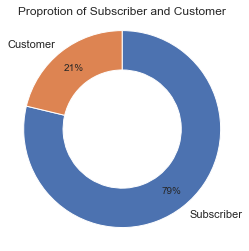

In [29]:
# Pie charts 
sorted_counts = df['user_type'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');
plt.title('Proprotion of Subscriber and Customer')
plt.axis('square');

**Observation**: This pie chart shows the proportion of **Subscriber and Customer**.As you can see on the chart 79% of bike user are subscriber and 21% of bike users are Customer.That means Ford Gobike service possesses about 80% regular client of whole user.

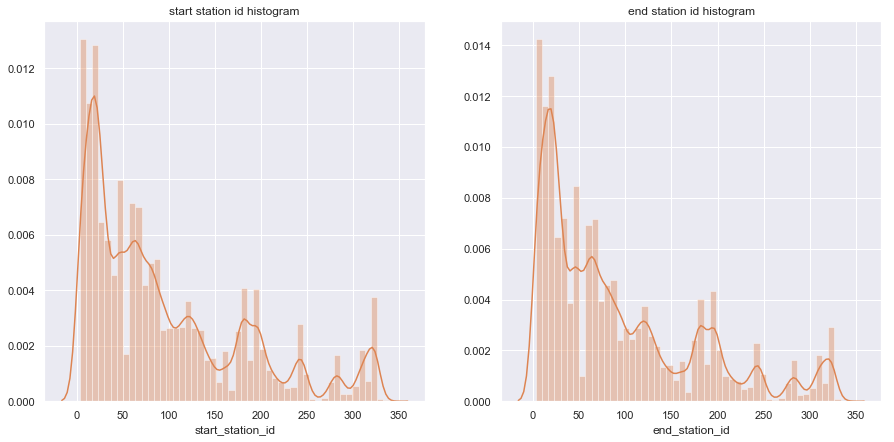

In [30]:
# distplot : Histogram + curve 
f,ax=plt.subplots(1,2,figsize=(15,7))
base_color = sns.color_palette()[1]
sns.distplot(df['start_station_id'],color=base_color,ax=ax[0])
ax[0].set_title('start station id histogram')
sns.distplot(df['end_station_id'],color=base_color,ax=ax[1])
ax[1].set_title('end station id histogram');

**Observation**:These graph show how many time each station are used as a start station and end station. Both graph show very similar tendency and line curve.The majortiy of station as a start point and end point are station id under 50.So station id under 50 is placed in areas with a large floating population.

In [31]:
# time series
df2 = df.copy()
#To keep original dataset use .copy()
df2['Hour'] = pd.to_datetime(df2['start_time']).dt.hour
df2['Minute'] = pd.to_datetime(df2['start_time']).dt.minute
df2['Second'] = pd.to_datetime(df2['start_time']).dt.second
df2['Count'] = 1
df2.head(1)

# Use datetime library to get a hour,minute and second data
# Ploting hour data on the graph 

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,Hour,Minute,Second,Count
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,16,57,39,1


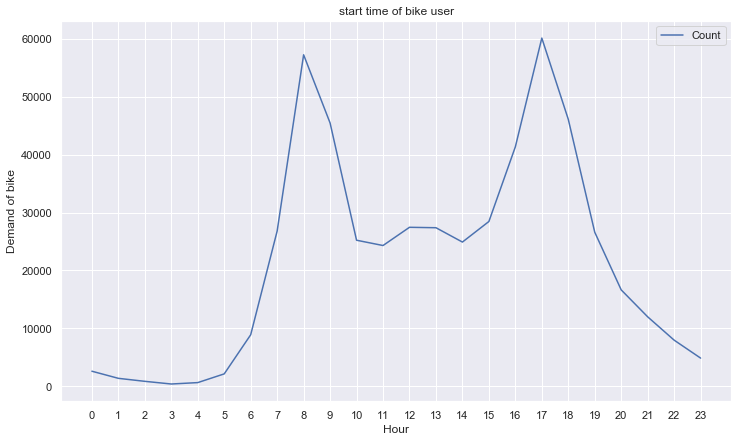

In [32]:
keys = [pair for pair, df in df2.groupby(['Hour'])]
plt.subplots(figsize=(12,7))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Demand of bike')
plt.xticks(keys)
plt.title('start time of bike user')
plt.legend()
plt.show()

**Observation**: The demand of bike in time series data shows in which time is the most busiest time that people rent a bike to go to work or get back home.Because at 7am and 6pm is peak time of bike demand which matches exactly to rush hour

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the visualization there is no unusal point or outlier.But transformations of dataset were applied for `start_time`and `end_time` variables to draw time series plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the second visualization(distplot) you can see that the graph is not normal distributed.The distrution of both graphs are right skewed so that we know which stations are required higher demand than other.This is very important insight for service provider.They can bring more bike on those stations to cover higher demand of customer.Also time series graph looks kind approximately symetrical distribution.The reason is that the tendency of graph is rasing from 0 to 7 o'clock.After that demand is sunk until 15o'clock and then the graph is gone up again until 18 o'clock and sunk again until the end.

## Bivariate Exploration

> Using 2 variables to show meaningful visualization by **countplot,heatamp and scatterplot**

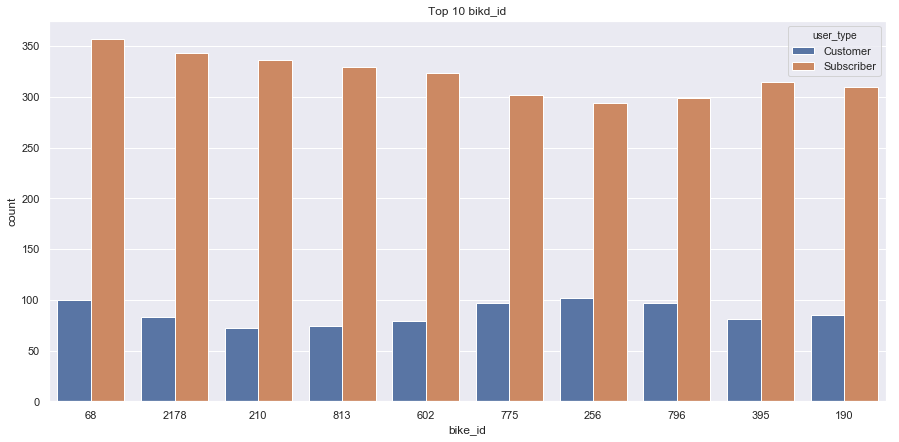

In [35]:
# countplot
plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='bike_id',hue='user_type',order=df.bike_id.value_counts().head(10).index)
plt.title('Top 10 bikd_id');

**Observation**: Get a top 10 demanded bikes of Ford Gobike service and are divided by user_type.Bike id:`68` is the most demanded bike for Gobike user.Especially for `Subscriber` but not for `Customer`.Bike id:`256`is most demanded bike for `Customer`

In [15]:
df.describe()

,duration_min,start_station_id,end_station_id,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000
mean,18.316825,95.034245,92.184041,1672.533079
std,57.402441,86.083078,84.969491,971.356959
min,1.016667,3.000000,3.000000,10.000000
25%,6.366667,24.000000,23.000000,787.000000
50%,9.933333,67.000000,66.000000,1728.500000
75%,15.633333,139.000000,134.000000,2520.000000
max,1439.483333,340.000000,340.000000,3733.000000


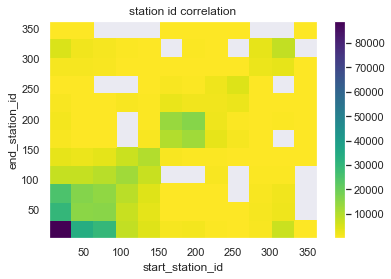

In [16]:
# heatmap for whole station id  
bin_x = np.arange(3,340+30,30)
bin_y = np.arange(3,340+30,30)

plt.hist2d(data=df,x='start_station_id',y='end_station_id',cmin=0.5,cmap='viridis_r',
           bins=[bin_x,bin_y]);
plt.colorbar()  # level of color in numeric value  
plt.xlabel('start_station_id')
plt.ylabel('end_station_id')
plt.title('station id correlation');

**Observation**: Using 2 variables(`start and end station_id`).Heatmap represent the correlation of 2 variables on the grid with many different colors. Colorbar helps to understand the meaning of each color on the heatmap. 

Determination of bin(interval) is based on df.describe(). Min and Max valúes are picked up for border of interval.But there is no fixed criteria for step of interval. So it's needed to try yourself to find a best step for interval.This process is called `polishing`

In [17]:
a=df[(df['start_station_id']<50) & (df['end_station_id']<50)]
a.describe()
sample = a.sample(1000)

# Querying the dataset with id under 50
# Sampling is useful method to make a faster code running if you have a large size of data. 

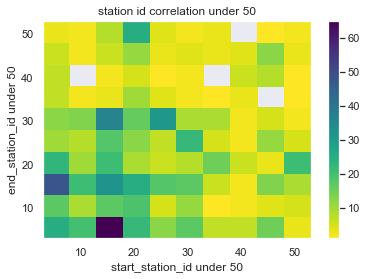

In [18]:
# heatmap
bin_x = np.arange(3,49+5,5)
bin_y = np.arange(3,49+5,5)

plt.hist2d(data=sample,x='start_station_id',y='end_station_id',cmin=0.5,cmap='viridis_r',
           bins=[bin_x,bin_y]);
plt.colorbar()  # level of color in numeric value  
plt.xlabel('start_station_id under 50')
plt.ylabel('end_station_id under 50')
plt.title('station id correlation under 50');

**Observation**: Basically same as above.But filtering station_id under 50.Because as you can see on the heatmap area `under 50` represent noticeably high bike demand.But this data is still tremendous.That implies it takes long time to run code and no differentiation of color variation on the heatmap.For that I used sampling method to plot another heatmap.

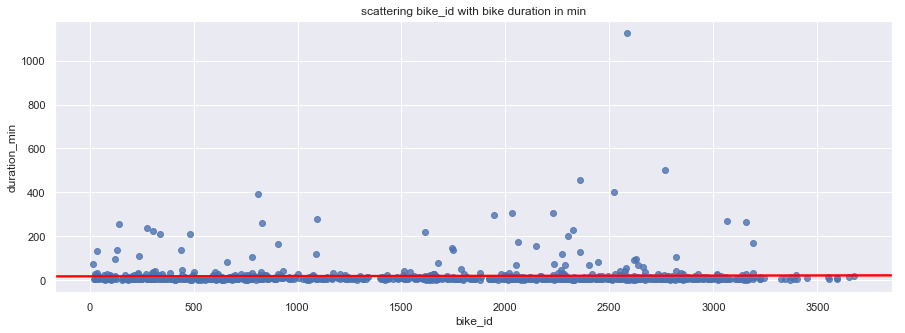

In [23]:
# Regplot : scatterplot + regressionline  
# Main data that was applied is sampling of original data.Because it's required long time to run code and plot.
# Furthermore sampling table represents better depiction on the grid than 'a'.
plt.subplots(figsize=(15,5))
sns.regplot(data=sample,x='bike_id',y='duration_min',x_jitter=0.04,fit_reg=True,line_kws={'color':'red'});
plt.title('scattering bike_id with bike duration in min');

**Observation**: Relationship between bike_id and duration in min is plotted by scatter.Threre are outlier or unusual points on the grid. But generally scatterplotting and regression are matched together.Customer rides a bike not for a long time because they use this service mainly for rush hour. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For countplot and scatterplot are main features(user_type or bike_id).From countplot we got demand of bike_id with different type of user. From scatterplot we got the average time of duration in each bike. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From heatmap were not used any main features.But we found a interesting insight that station_id under 50 are are probably placed in areas with a large floating population.

## Multivariate Exploration

> Using more than 2 variables to show meaningful visualization by **scatterplot and FacetGrid**

In [25]:
user_type=sample['user_type']

In [26]:
user_type.value_counts()

Subscriber    761
Customer      239
Name: user_type, dtype: int64

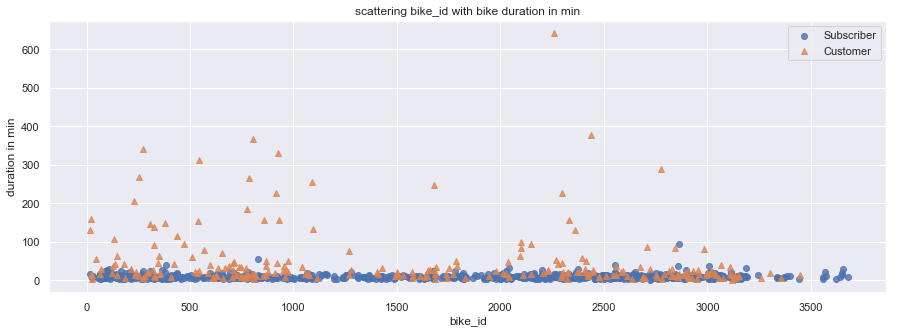

In [27]:
# Regplot with shape variation 
plt.subplots(figsize=(15,5))
type_marker =[['Subscriber','o'],['Customer','^']]


for ttype,marker in type_marker:
    plot_data = sample.loc[user_type==ttype]
    ax=sns.regplot(data=plot_data,x='bike_id',y='duration_min',x_jitter=0.04,marker=marker,fit_reg=False);

    
plt.xlabel('bike_id');
plt.ylabel('duration in min');
plt.title('scattering bike_id with bike duration in min');
plt.legend(['Subscriber','Customer']);

**observation** : Same as scatterplotting of bivarate exploration. Additionally `user_type` variable is used in different shapes.
Marker shows clearly that `Customer` has markedly a lot of outlier than `Subscriber`.

In [33]:
df3=df.sample(1000)
df3=df3.reset_index()
# sampling from df 
# re-indexing the df3 

In [36]:
# start_station_id categorize
list = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['start_station_id'][i] <=100:
        df3['start_station_id'][i] ='low'
        list.append(df3['start_station_id'][i])
    elif 100< df3['start_station_id'][i] <=200:
        df3['start_station_id'][i] ='middle'
        list.append(df3['start_station_id'][i])
    elif 200<df3['start_station_id'][i] <=300:
        df3['start_station_id'][i] ='high'
        list.append(df3['start_station_id'][i])    
    else :
        df3['start_station_id'][i] ='extrem high'
        list.append(df3['start_station_id'][i])        
        
        
# end_station_id categorize
list2 = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['end_station_id'][i] <=100:
        df3['end_station_id'][i] ='low'
        list2.append(df3['end_station_id'][i])
    elif 100< df3['end_station_id'][i] <=200:
        df3['end_station_id'][i] ='middle'
        list2.append(df3['end_station_id'][i])
    elif 200<df3['end_station_id'][i] <=300:
        df3['end_station_id'][i] ='high'
        list2.append(df3['end_station_id'][i])    
    else :
        df3['end_station_id'][i] ='extrem high'
        list2.append(df3['end_station_id'][i])     
        
        
        
# Categorization of numeric data is a good way to show clear visualization.
# Also limited kind of categorical (for instance 4-5 different) data are used for various shape of visualization. 
# 'User_type' is only categorical data.That's why station_id were chosen to become a categorical data
# Interval from 0 to 100 :low
# Interval from 101 to 200 : middle
# Interval from 201 to 300 : high
# Interval over 300 : extreme high

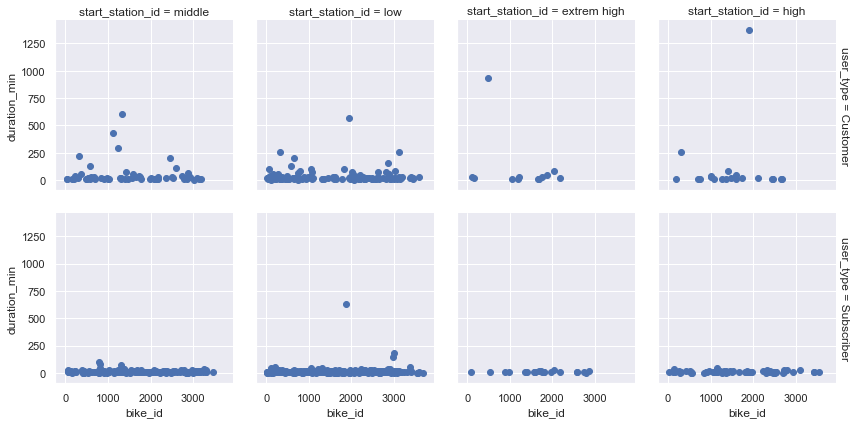

In [40]:
#Faceting : start_station_id,user_type,bike_id,duration_min
g = sns.FacetGrid(data=df3,col='start_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

**Observation**: Throughout for loop we got station id in categorical form.Now it is possible to use a column of facetgrid.So totally 4 variables(`bike_id and duration_min as a main features` and `start_station_id with user_type`).The scattering tendency is similiar as scatterplotting of bivariate exploration.

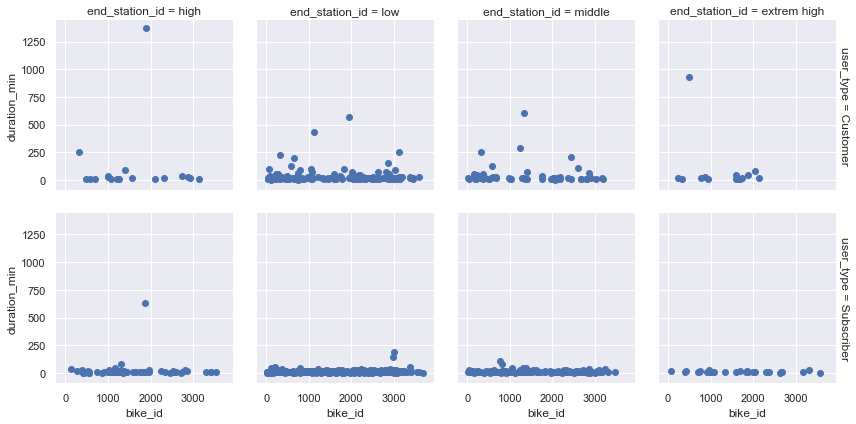

In [47]:
#Faceting : end_station_id,user_type,bike_id,duration_min
base_color = sns.color_palette()[6]
g = sns.FacetGrid(data=df3,col='end_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

**Observation**: Same as above.But we take here `end_station_id` instead of `start_station_id`.Notice  With end_station id from 101 to 200 and user_type subscriber shows that there is no unusual points or outlier in the grid.**(ideal scatterplotting)**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Compare to Subscriber has user_type:Customer a lot of outlier.Probably because they aren't regular Gobike user.

### Were there any interesting or surprising interactions between features?

>  User_type has strongre impact on the outlier than the station_id

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!